### Discussion Related with Outliers and Impact on Machine Learning

#### Which machine learning Model are Sensitive to Outliers?
1. Naive Bayers Classifier --- Not Sensitive to Outliers
2. SVM ----------------------- Not Sensitive to Outliers
3. Linear Regression  -------- Sensitive to outlier 
4. Logitics Regression ------- Sensitive to outlier
5. Deceition Tree Regressor or Classifier -- Not Sensitive to outlier
6. Ensemble(Random Forest, XGBoost) --- Not Sensitive to outlier
7. KNN ----------------------- Not Sensitive to outlier
8. K-Means ------------------- Sensitive to outlier
9. Hireacharial -------------- Sensitive to outlier
10. PCA ---------------------- Sensitive to outlier
11. Neural Network ----------- Sensitive to outlier

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('D://DS//titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.isnull().sum().sum()

3869

In [4]:
import seaborn as sns

C:\Users\rohit.pratapwar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

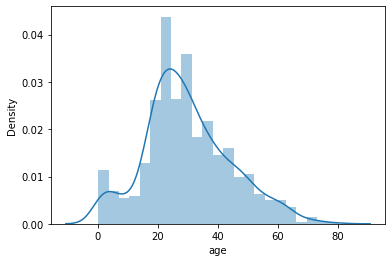

In [5]:
sns.distplot(df['age'].dropna())

C:\Users\rohit.pratapwar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

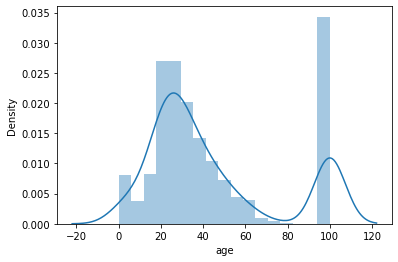

In [6]:
sns.distplot(df['age'].fillna(100))

<AxesSubplot:>

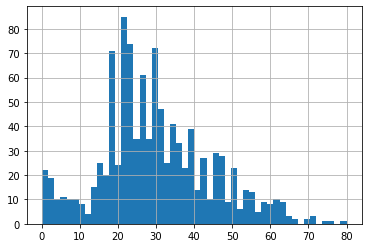

In [7]:
df.age.hist(bins=50)

<AxesSubplot:xlabel='age'>

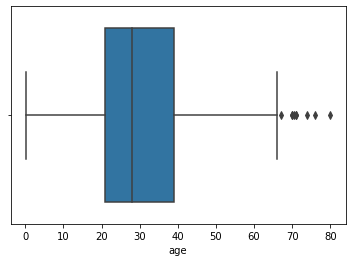

In [8]:
sns.boxplot(data=df,x='age')

In [9]:
df['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

#### Assuming Age follows Gaussian distribution we will calculate the baundries which differences the outliers

In [10]:
upper_boundry = df['age'].mean() +3 * df['age'].std()
lower_boundry = df['age'].mean() -3 * df['age'].std()

In [11]:
print(upper_boundry)
print(df['age'].mean())
print(lower_boundry) 

73.12163361219909
29.8811345124283
-13.359364587342487


#### Lets compute the Interquantile Range to calculate boundries

In [12]:
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
IQR

18.0

In [13]:
lower_bridge = df['age'].quantile(0.25) - (IQR * 1.5)
upper_bridge = df['age'].quantile(0.75) + (IQR * 1.5)
print(lower_bridge,upper_bridge)

-6.0 66.0


In [14]:
### Extreme Outliers
lower_bridge = df['age'].quantile(0.25) - (IQR * 3)
upper_bridge = df['age'].quantile(0.75) + (IQR * 3)
print(lower_bridge,upper_bridge)

-33.0 93.0


#### Feature is skewed

<AxesSubplot:>

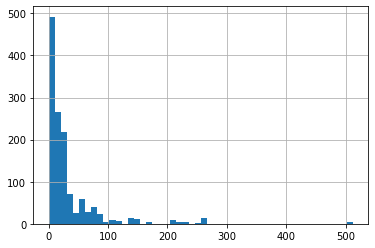

In [15]:
df.fare.hist(bins=50)

C:\Users\rohit.pratapwar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fare'>

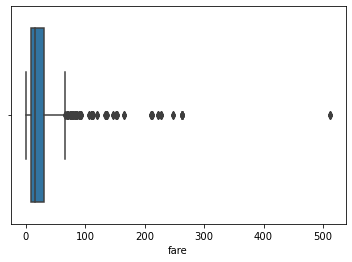

In [16]:
sns.boxplot(df['fare'])

In [17]:
df['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [18]:
IQR = df.fare.quantile(0.75) - df.fare.quantile(0.25)
IQR

23.379199999999997

In [19]:
### Extreme Outliers
lower_bridge = df['fare'].quantile(0.25) - (IQR * 3)
upper_bridge = df['fare'].quantile(0.75) + (IQR * 3)
print(lower_bridge,upper_bridge)

-62.24179999999999 101.4126


In [20]:
data = df.copy()

In [21]:
data.loc[data['age'] > 73,'age'] = 73

In [22]:
data.loc[data['fare'] >= 100,'fare'] = 101

<AxesSubplot:>

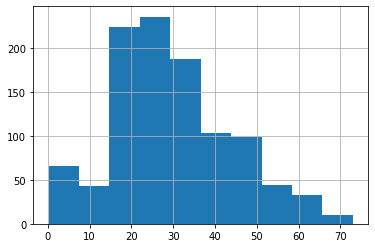

In [23]:
data.age.hist()

<AxesSubplot:>

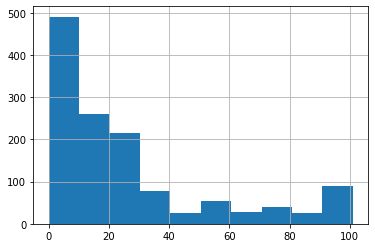

In [24]:
data.fare.hist()